<a href="https://colab.research.google.com/github/katkarsshweta/ccoew-group8-currencyconverter/blob/main/NRT_GRAPHPLOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install pmdarima
!pip install requests


In [12]:
import requests

ngrok_url = "https://4106-58-84-60-48.ngrok.io"  # Replace with your Ngrok URL

response = requests.get(ngrok_url)
print(response.text)


<!doctype html>
<html>
<head>
    <style type="text/css">
        [class^="ant-"]::-ms-clear,
        [class*="ant-"]::-ms-clear {
            display: none;
        }
        [class^="ant-"],
        [class*="ant-"],
        [class^="ant-"] *,
        [class*="ant-"] *,
        [class^="ant-"] *::before,
        [class*="ant-"] *::before,
        [class^="ant-"] *::after,
        [class*="ant-"] *::after {
            box-sizing: border-box;
        }
        html,
        body {
            width: 100%;
            height: 100%;
        }
        *,
        *::before,
        *::after {
            box-sizing: border-box;
        }
        html {
            font-family: sans-serif;
            line-height: 1.15;
            -webkit-text-size-adjust: 100%;
            -ms-text-size-adjust: 100%;
            -ms-overflow-style: scrollbar;
            -webkit-tap-highlight-color: rgba(0, 0, 0, 0);
        }
        body {
            margin: 0;
            color: rgba(0, 0, 0, 0.85);
 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2012-01-03 to 2012-12-28
Data columns (total 51 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Algerian dinar   (DZD)                            219 non-null    float64
 1   Australian dollar   (AUD)                         240 non-null    float64
 2   Bahrain dinar   (BHD)                             247 non-null    float64
 3   Bolivar Fuerte   (VEF)                            240 non-null    float64
 4   Botswana pula   (BWP)                             236 non-null    float64
 5   Brazilian real   (BRL)                            247 non-null    float64
 6   Brunei dollar   (BND)                             233 non-null    float64
 7   Canadian dollar   (CAD)                           236 non-null    float64
 8   Chilean peso   (CLP)                              237 non-null    float64
 9   Ch

<Axes: xlabel='Date'>

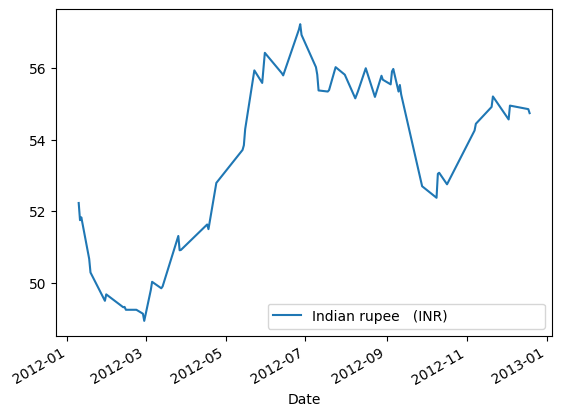

In [11]:
import pandas as pd
from pmdarima import auto_arima
import warnings
import statsmodels.api as sm

df = pd.read_csv('Exchange_Rate_Report_2012.csv', index_col='Date', parse_dates=True)
df.info()


df.dropna(inplace = True)

data = df.copy()

#to check the data shape
data.shape

# To remove warnings and find optimal ARIMA
warnings.filterwarnings('ignore')
model = auto_arima(y=data['Indian rupee   (INR)                     '], trace = True)

# designing model
m = sm.tsa.arima.ARIMA(data['Indian rupee   (INR)                     '], order=(0,1,0))
result = m.fit()
result.summary()

#Predicting the data
start = 0
end = len(data)-1
pred = result.predict(start = start, end = end, typ = 'levels')
print(pred)

#plotting the history of exchange rates
data['Indian rupee   (INR)                     '].plot(legend=True)
